<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/LightGBM/47_LightGBM_Regressor_With_Transformer_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/21-housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

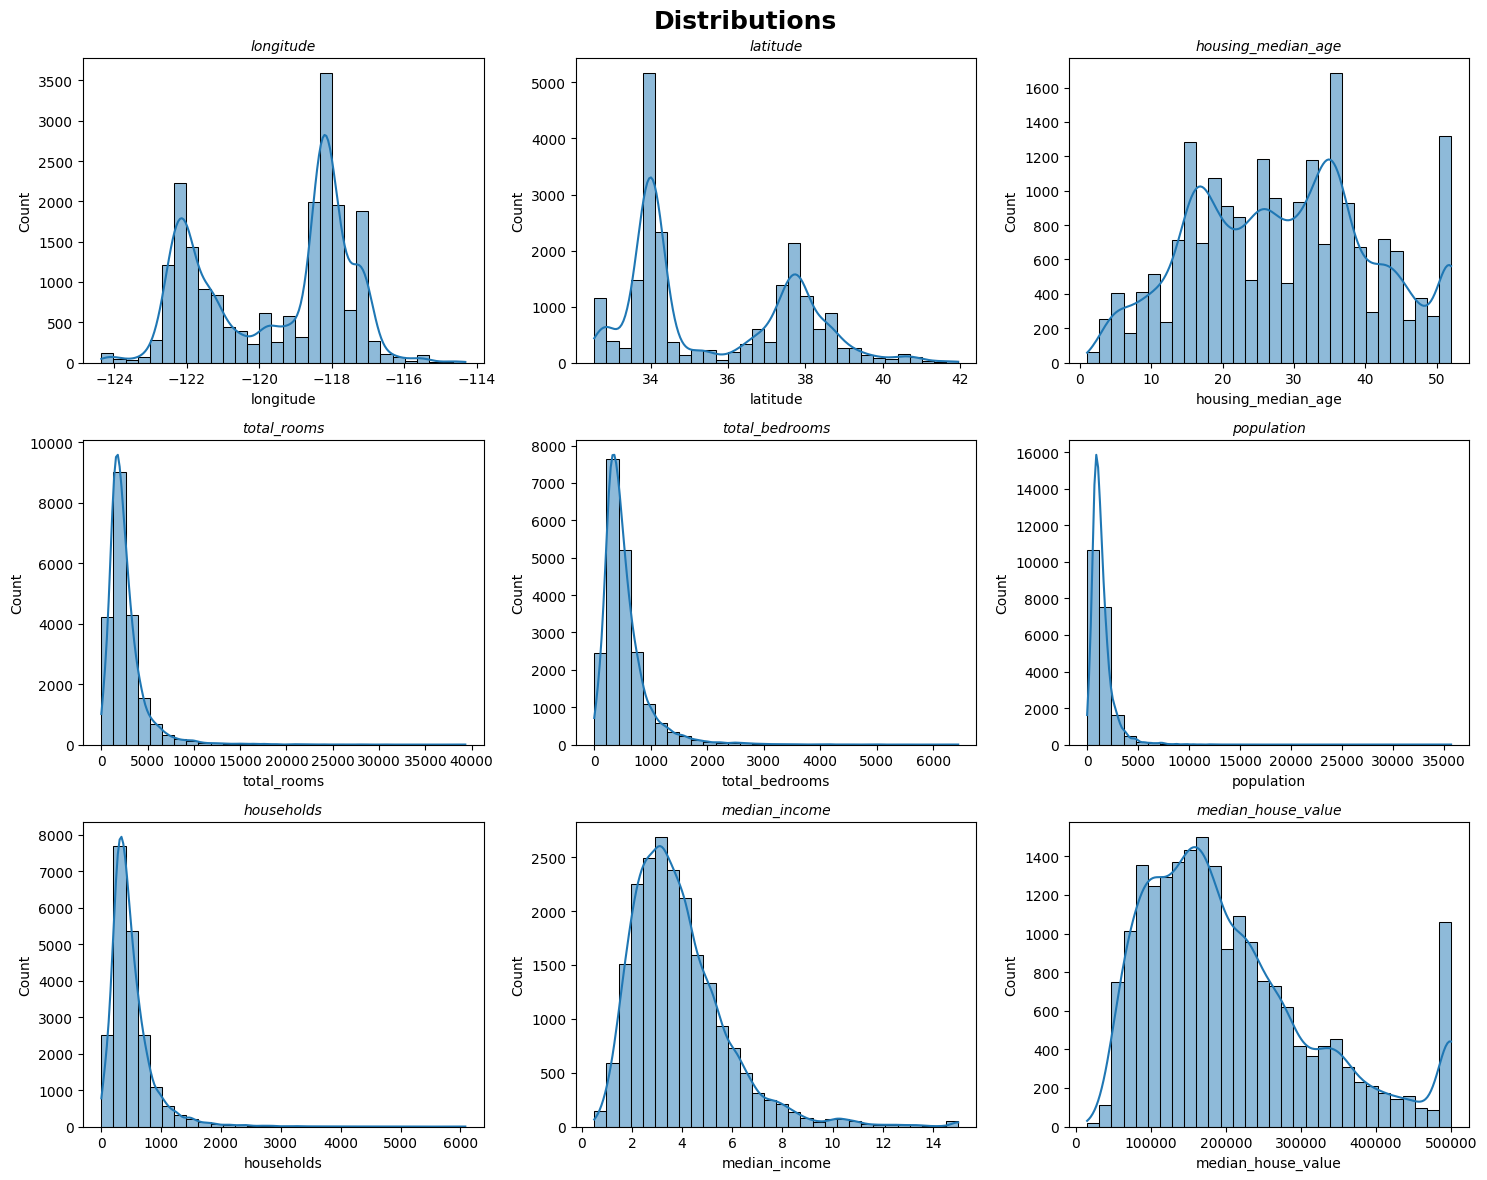

In [ ]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(15,12))
fig.suptitle("Distributions", fontsize = 18, fontweight = "bold")

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data = df, x = col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle = "italic")

plt.tight_layout()
plt.show()

In [ ]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
# bazı kolonların birbirleriyle multicolinearity içinde olduğunu görebiliyoruz bu yüzden outlierlardan kurtulacağız.

In [ ]:
def find_outliers_iqr(df, threshold = 1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[ (df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_summary[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
            "lower_bound" : lower_bound,
            "upper_bound" : upper_bound
        }
    return pd.DataFrame(outlier_summary)

In [ ]:
find_outliers_iqr(df, threshold = 1.5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.000000
outlier_percentage,0.000,0.00,0.0,6.235465,6.157946,5.794574,5.910853,3.299419,5.188953
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.500000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000


In [ ]:
# i will only remove outliers in our target column which is median_house_value
# model tries to predict this value and outliers in target column may corrupt loss function and result in deviations
# of course outliers in input columns may corrupt the model as well but if we are using a decision tree based model
# such as gradients, forests etc it wouldn't hurt us much

In [ ]:
def remove_outliers_from_column(df,target_col, threshold = 1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[ (df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
def remove_outliers_from_all_columns(df, threshold = 1.5):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean.copy()

In [ ]:
print("original data shape: ", df.shape)
df_target_clean = remove_outliers_from_column(df, "median_house_value")
print("only target column cleaning shape: ", df_target_clean.shape)
df_all_clean = remove_outliers_from_all_columns(df)
print("all columns cleaning shape: ", df_all_clean.shape)

original data shape:  (20640, 10)
only target column cleaning shape:  (19569, 10)
all columns cleaning shape:  (17446, 10)


In [ ]:
# i am going to use only target column cleaning in this case for the reasons i mentioned
# if you want, you can train the model with these different dfs to compare the performance

In [ ]:
df_target_clean.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,200
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df_target_clean['total_bedrooms'] = df_target_clean["total_bedrooms"].fillna(df['total_bedrooms'].median())

/tmp/ipython-input-178262601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_clean['total_bedrooms'] = df_target_clean["total_bedrooms"].fillna(df['total_bedrooms'].median())


In [ ]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,-119.562786,35.654159,28.352752,2619.977260,538.821299,1442.788952,501.394859,3.665568,190852.301906
std,2.005764,2.151007,12.497772,2183.419302,420.617106,1145.011369,383.396308,1.557927,95438.555669
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,299.000000,797.000000,282.000000,2.522700,116200.000000
50%,-118.510000,34.270000,28.000000,2110.000000,435.000000,1181.000000,411.000000,3.441200,173200.000000
75%,-117.990000,37.730000,37.000000,3123.000000,645.000000,1749.000000,606.000000,4.572100,246700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


In [ ]:
df_target_clean.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df_target_clean["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,8552
INLAND,6519
NEAR OCEAN,2419
NEAR BAY,2074
ISLAND,5


In [ ]:
df_target_clean = pd.get_dummies(df_target_clean, columns=['ocean_proximity'],drop_first=True)

In [ ]:
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [ ]:
X = df_target_clean.drop("median_house_value",axis=1)
y = df_target_clean["median_house_value"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [ ]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
y_train

,median_house_value
6487,176300.0
15385,117000.0
12111,85400.0
10811,188700.0
3290,53300.0
...,...
6857,301100.0
17117,157300.0
2726,56100.0
8422,192800.0


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
model = LGBMRegressor()
model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1844
[LightGBM] [Info] Number of data points in the train set: 13698, number of used features: 11
[LightGBM] [Info] Start training from score 190578.120602


LGBMRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("R2 SCORE : ",r2_score(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))

R2 SCORE :  0.8040731000916006
Mean Squared Error :  1810965089.1341524


In [ ]:
#hyperparameter tuning

In [ ]:
param_grid = {
    "num_leaves" : [31,50,70],
    "max_depth" : [-1,5,10],
    "learning_rate" : [0.01,0.05,0.1],
    "n_estimators" : [100,300,1000],
    "min_child_samples" : [10,20,30],
    "subsample" : [0.6,0.8,1.0],
    "colsample_bytree" : [0.6,0.8,1.0],
    "reg_alpha" : [0,0.5,1.0],
    "reg_lambda" : [0,0.5,1.0]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
rcv = RandomizedSearchCV(estimator = LGBMRegressor(verbosity=-1),param_distributions=param_grid,cv=5,verbose=0,random_state=15,scoring="neg_root_mean_squared_error",n_jobs=-1)

In [ ]:
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 5, 10],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 300, 1000],
                                        'num_leaves': [31, 50, 70],
                                        'reg_alpha': [0, 0.5, 1.0],
                                        'reg_lambda': [0, 0.5, 1.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=15, scoring='neg_root_mean_squared_error')

In [ ]:
rcv.best_params_

{'subsample': 0.8,
 'reg_lambda': 0,
 'reg_alpha': 1.0,
 'num_leaves': 70,
 'n_estimators': 300,
 'min_child_samples': 20,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6}

In [ ]:
y_pred = rcv.predict(X_test)

In [ ]:
print("R2 SCORE : ",r2_score(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))

R2 SCORE :  0.8196672089085768
Mean Squared Error :  1666827726.28655


In [ ]:
# transformation whole columns because in our dataset there are unstructered columns not just our target as you see above so we can apply to whole columns

In [ ]:
# X => yeo johnson transform y => boxcox
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt_X = PowerTransformer(method = "yeo-johnson")

In [ ]:
X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

In [ ]:
column_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
X_train_transformed_df = pd.DataFrame(X_train_transformed,columns=column_names)

In [ ]:
X_train_transformed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.387779e-15,-0.671009,0.486589,0.050535,0.024486,0.358262,0.058133,-0.018646,1.411199,-0.014801,-0.340747,-0.375912
1,2.470246e-15,-1.204064,-0.970340,0.432472,0.522880,0.628352,0.363502,-0.940026,-0.708617,-0.014801,-0.340747,-0.375912
2,2.053913e-15,-0.721618,0.022996,0.305957,0.685678,0.800713,0.621156,-0.907275,1.411199,-0.014801,-0.340747,-0.375912
3,1.471046e-15,-0.972146,-0.296774,0.225063,0.655990,0.434484,0.557085,-0.254036,-0.708617,-0.014801,-0.340747,-0.375912
4,-2.636780e-15,1.423100,-0.056065,-0.548070,-0.448847,-0.944478,-0.697868,-2.133232,1.411199,-0.014801,-0.340747,-0.375912
...,...,...,...,...,...,...,...,...,...,...,...,...
13693,1.221245e-15,-0.696224,-0.056065,-0.355082,-0.693158,-0.593331,-0.599422,1.324302,-0.708617,-0.014801,-0.340747,-0.375912
13694,-2.275957e-15,0.937386,0.637451,0.043574,0.083982,0.721670,0.110812,-0.815634,-0.708617,-0.014801,2.934729,-0.375912
13695,4.024558e-15,-1.599035,0.179499,-1.336357,-1.128823,-0.681751,-1.090558,-1.525335,1.411199,-0.014801,-0.340747,-0.375912
13696,1.026956e-15,-0.779423,0.256983,0.340278,0.660585,0.741306,0.522974,0.058431,-0.708617,-0.014801,-0.340747,-0.375912


In [ ]:
import math
def plot_all_histograms(df,title_prefix = ""):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(numeric_cols)/n_cols)

    plt.figure(figsize=(5*n_cols,4*n_rows))

    for i, col in enumerate(numeric_cols,1):
      plt.subplot(n_rows,n_cols,i)
      sns.histplot(df[col],kde=True,bins=30)
      plt.title(f"{title_prefix} {col}")
      plt.xlabel("")
      plt.ylabel("")

    plt.tight_layout()
    plt.show()

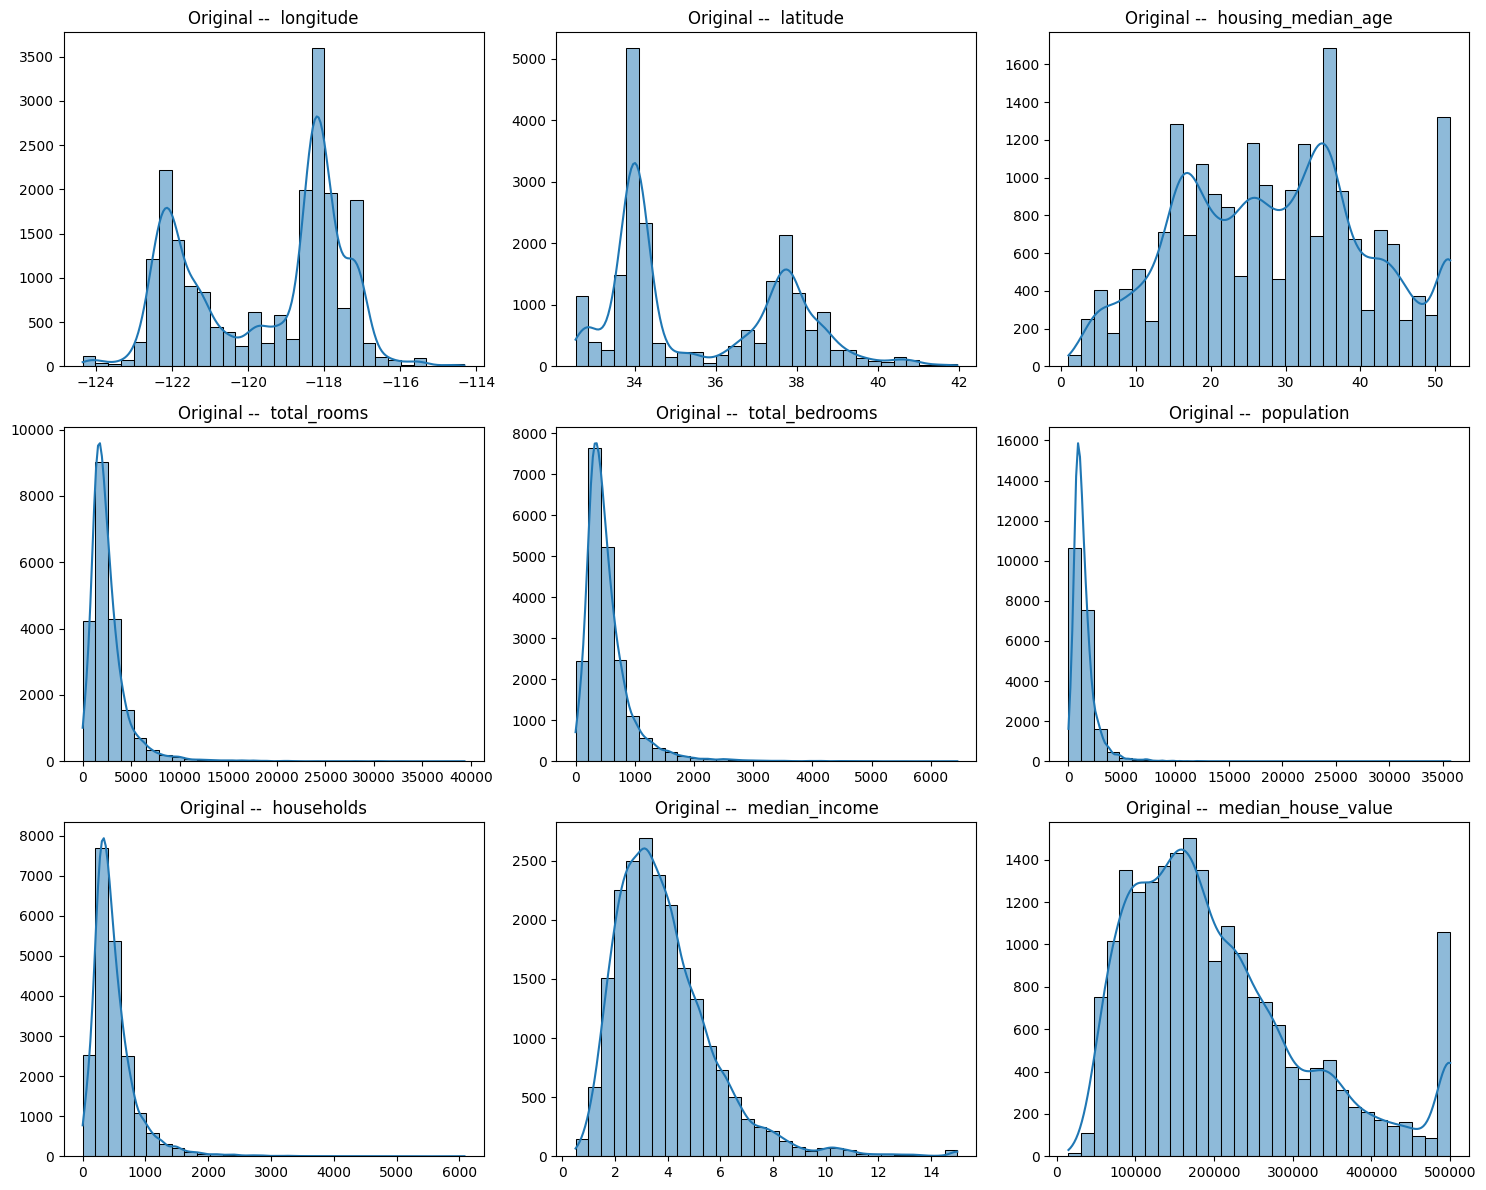

In [ ]:
plot_all_histograms(df,title_prefix="Original -- ")

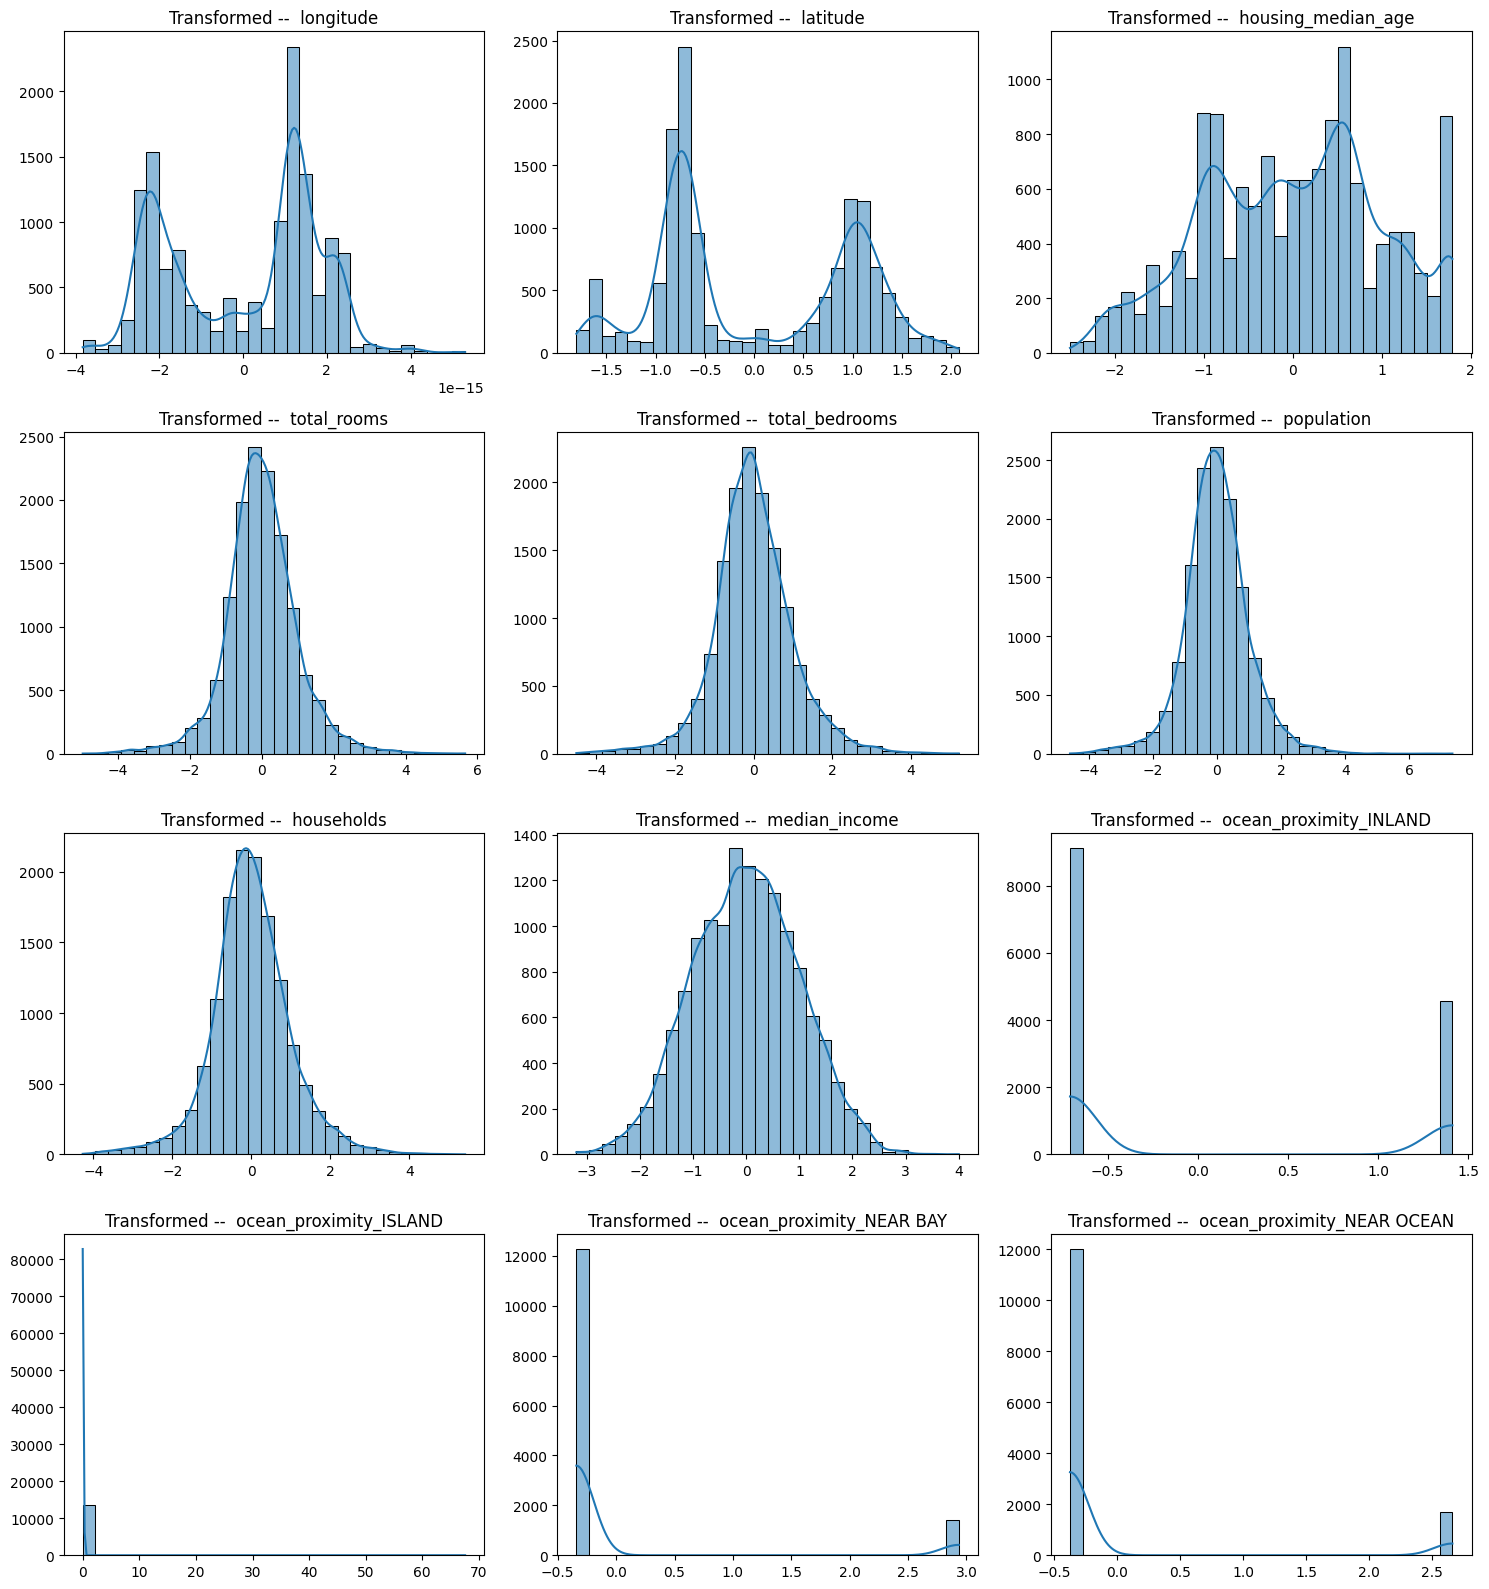

In [ ]:
plot_all_histograms(X_train_transformed_df,title_prefix="Transformed -- ")

In [ ]:
from scipy.stats import boxcox

In [ ]:
y_train_transformed , lambda_y = boxcox(y_train)

In [ ]:
def inverse_boxcox(y,lambda_):
  if lambda_ == 0 :
    return np.exp(y)
  else:
    return np.power(y*lambda_+1,1/lambda_)

In [ ]:
model = LGBMRegressor()
model.fit(X_train_transformed,y_train_transformed)

LGBMRegressor()

In [ ]:
y_pred_transformed = model.predict(X_test_transformed)

In [ ]:
y_pred_original = inverse_boxcox(y_pred_transformed,lambda_y)

In [ ]:
print("R2 SCORE : ",r2_score(y_test,y_pred_original))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred_original))

R2 SCORE :  0.7991205171099133
Mean Squared Error :  1856742136.0075989
